In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import json

1. Index: the index number of a row
2. Address: the address of the ethereum account
3. FLAG: whether the transaction is fraud or not
4. Avg min between sent tnx: Average time between sent transactions for account in minutes
5. Avg min between received tnx: Average time between received transactions for account in minutes
6. Time Diff between first and_last (Mins): Time difference between the first and last transaction
7. Sent_tnx: Total number of sent normal transactions
8. Received_tnx: Total number of received normal transactions
9. NumberofCreated_Contracts: Total Number of created contract transactions
10. UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transaction
11. UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions
12. MinValueReceived: Minimum value in Ether ever received
13. MaxValueReceived: Maximum value in Ether ever received
14. AvgValueReceived5Average value in Ether ever received
15. MinValSent: Minimum value of Ether ever sent
16. MaxValSent: Maximum value of Ether ever sent
17. AvgValSent: Average value of Ether ever sent
18. MinValueSentToContract: Minimum value of Ether sent to a contract
19. MaxValueSentToContract: Maximum value of Ether sent to a contract
20. AvgValueSentToContract: Average value of Ether sent to contracts
21. TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
23. TotalEtherSent:Total Ether sent for account address
24. TotalEtherReceived: Total Ether received for account address
25. TotalEtherSent_Contracts: Total Ether sent to Contract addresses
26. TotalEtherBalance: Total Ether Balance following enacted transactions
27. TotalERC20Tnxs: Total number of ERC20 token transfer transactions
28. ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
29. ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
30. ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
31. ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
32. ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
33. ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
34. ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
35. ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
36. ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
37. ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
38. ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
39. ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
40. ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
41. ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
42. ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
43. ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
44. RC20UniqRecTokenName: Number of Unique ERC20 tokens received
45. ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
46. ERC20MostRecTokenType: Most received token for account via ERC20 transactions


In [2]:
InitDf = pd.read_csv("../data/transaction_dataset.csv")

In [3]:
InitDf.drop(['Unnamed: 0','Index'],axis=1,inplace=True)

In [4]:
InitDf

Address  FLAG   
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0  \
1     0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2     0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...                                          ...   ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx   
0                       844.26                       1093.71  \
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx   
0                                   704785.63       721            89  \
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  Unique Received From Addresses   
0                               0                              40  \
1                               0                               5   
2                               0                              10   
3                               0                               7   
4                               1                               7   
...                           ...                             ...   
9836                            0                              11   
9837                            0                               0   
9838                            0                              31   
9839                            0                               1   
9840                            0                               1   

      Unique Sent To Addresses  min value received  max value received    
0                          118            0.000000            45.806785  \
1                           14            0.000000             2.613269   
2                            2            0.113119             1.165453   
3                           13            0.000000           500.000000   
4                           19            0.000000            12.802411   
...                        ...                 ...                  ...   
9836                         4            0.004082            12.000000   
9837                         0            0.000000             0.000000   
9838                        44            0.001078            21.310000   
9839                         0            0.500000             0.500000   
9840                         5            0.

### X-Y Split & Sanity Checks 

In [5]:
### Creating a deep copy of the dataframe
InitDf_Copy = InitDf.copy(deep=True)

In [6]:
X = InitDf_Copy.iloc[:,2:-1]

In [7]:
X

Avg min between sent tnx  Avg min between received tnx   
0                       844.26                       1093.71  \
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx   
0                                   704785.63       721            89  \
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  Unique Received From Addresses   
0                               0                              40  \
1                               0                               5   
2                               0                              10   
3                               0                               7   
4                               1                               7   
...                           ...                             ...   
9836                            0                              11   
9837                            0                               0   
9838                            0                              31   
9839                            0                               1   
9840                            0                               1   

      Unique Sent To Addresses  min value received  max value received    
0                          118            0.000000            45.806785  \
1                           14            0.000000             2.613269   
2                            2            0.113119             1.165453   
3                           13            0.000000           500.000000   
4                           19            0.000000            12.802411   
...                        ...                 ...                  ...   
9836                         4            0.004082            12.000000   
9837                         0            0.000000             0.000000   
9838                        44            0.001078            21.310000   
9839                         0            0.500000             0.500000   
9840                         5            0.795233         18998.000000   

      avg val received  min val sent  max val sent  avg val sent   
0             6.589513      0.000000     31.220000      1.200681  \
1             0.385685      0.000000      1.800000      0.032844   
2             0.358906      0.050000      3.538616      1.794308   
3            99.488840      0.000000    450.000000     70.001834   
4             2.671095      0.000000      9.000000      0.022688   
...                ...           ...           ...           ...   
9836          2.821060      0.465461     12.200000      9.166365   
9837          0.000000      0.000000      0.000000      0.000000   
9838          1.23

In [8]:
Y = InitDf_Copy['FLAG']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Avg min between sent tnx                              9841 non-null   float64
 1   Avg min between received tnx                          9841 non-null   float64
 2   Time Diff between first and last (Mins)               9841 non-null   float64
 3   Sent tnx                                              9841 non-null   int64  
 4   Received Tnx                                          9841 non-null   int64  
 5   Number of Created Contracts                           9841 non-null   int64  
 6   Unique Received From Addresses                        9841 non-null   int64  
 7   Unique Sent To Addresses                              9841 non-null   int64  
 8   min value received                                    9841

In [10]:
X.columns

Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg tim

In [11]:
numerical_valued_columns = []
for i in X.columns:
    if X[i].dtype == float or X[i].dtype == int:
        numerical_valued_columns.append(i)

In [12]:
numerical_valued_columns_renamed = [x.lstrip().rstrip().replace(" ","_") for x in numerical_valued_columns]

In [13]:
numerical_rename = dict(zip(numerical_valued_columns,numerical_valued_columns_renamed))

In [14]:
X.rename(columns=numerical_rename,inplace=True)

In [15]:
X

Avg_min_between_sent_tnx  Avg_min_between_received_tnx   
0                       844.26                       1093.71  \
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time_Diff_between_first_and_last_(Mins)  Sent_tnx  Received_Tnx   
0                                   704785.63       721            89  \
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number_of_Created_Contracts  Unique_Received_From_Addresses   
0                               0                              40  \
1                               0                               5   
2                               0                              10   
3                               0                               7   
4                               1                               7   
...                           ...                             ...   
9836                            0                              11   
9837                            0                               0   
9838                            0                              31   
9839                            0                               1   
9840                            0                               1   

      Unique_Sent_To_Addresses  min_value_received  max_value_received   
0                          118            0.000000           45.806785  \
1                           14            0.000000            2.613269   
2                            2            0.113119            1.165453   
3                           13            0.000000          500.000000   
4                           19            0.000000           12.802411   
...                        ...                 ...                 ...   
9836                         4            0.004082           12.000000   
9837                         0            0.000000            0.000000   
9838                        44            0.001078           21.310000   
9839                         0            0.500000            0.500000   
9840                         5            0.795233        18998.000000   

      avg_val_received  min_val_sent  max_val_sent  avg_val_sent   
0             6.589513      0.000000     31.220000      1.200681  \
1             0.385685      0.000000      1.800000      0.032844   
2             0.358906      0.050000      3.538616      1.794308   
3            99.488840      0.000000    450.000000     70.001834   
4             2.671095      0.000000      9.000000      0.022688   
...                ...           ...           ...           ...   
9836          2.821060      0.465461     12.200000      9.166365   
9837          0.000000      0.000000      0.000000      0.000000   
9838          1.234192      0.

In [16]:
object_valued_columns = []
for i in X.columns:
    if X[i].dtype == object or X[i].dtype == str:
        object_valued_columns.append(i)

In [17]:
object_valued_columns_renamed = [x.lstrip().rstrip().replace(" ","_") for x in object_valued_columns]

In [18]:
object_rename = dict(zip(object_valued_columns,object_valued_columns_renamed))

In [19]:
X.rename(columns=object_rename,inplace=True)

### Null Value Analysis

In [20]:
(X.isnull().sum() / len(X) * 100).round(2)

Avg_min_between_sent_tnx                                 0.00
Avg_min_between_received_tnx                             0.00
Time_Diff_between_first_and_last_(Mins)                  0.00
Sent_tnx                                                 0.00
Received_Tnx                                             0.00
Number_of_Created_Contracts                              0.00
Unique_Received_From_Addresses                           0.00
Unique_Sent_To_Addresses                                 0.00
min_value_received                                       0.00
max_value_received                                       0.00
avg_val_received                                         0.00
min_val_sent                                             0.00
max_val_sent                                             0.00
avg_val_sent                                             0.00
min_value_sent_to_contract                               0.00
max_val_sent_to_contract                                 0.00
avg_valu

In [21]:
X.describe()

Avg_min_between_sent_tnx  Avg_min_between_received_tnx   
count               9841.000000                   9841.000000  \
mean                5086.878721                   8004.851184   
std                21486.549974                  23081.714801   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                   17.340000                    509.770000   
75%                  565.470000                   5480.390000   
max               430287.670000                 482175.490000   

       Time_Diff_between_first_and_last_(Mins)      Sent_tnx  Received_Tnx   
count                             9.841000e+03   9841.000000   9841.000000  \
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number_of_Created_Contracts  Unique_Received_From_Addresses   
count                  9841.000000                     9841.000000  \
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique_Sent_To_Addresses  min_value_received  max_value_received   
count               9841.000000         9841.000000         9841.000000  \
mean                  25.840159           43.845153          523.152481   
std                  263.820410          325.929139        13008.821539   
min                    0.000000            0.000000            0.000000   
25%                    1.000000            0.001000            1.000000   
50%                    2.000000            0.095856            6.000000   
75%                    3.000000            2.000000           67.067040   
max                 9287.000000        10000.000000       800000.000000   

       avg_val_received  min_val_sent   max_val_sent  avg_val_sent   
count       9841.000000   9841.000000    9841.000000   9841.000000  \
mean         100.711721      4.800090     314.617297     44.755731   
std         2885.002236    138.609682    6629.212643    239.080215   
min            0.000000      0.000000       0.000000      0.000000   
25%            0.426905      0.000000       0.164577      0.086184   
50%            1.729730      0.049126       4.999380      1.606000   
75%           22.000000      0.998800      61.520653     21.999380   
max       283618.831600  12000.000000  520000.000000  12000.000000   

       min_value_sent_to_contract  max_val_sent_to_contract   
count                 9841.000000               9841.000000  \
mean                     0.000003                  0.000008   
std                      0.000225                  0.000516   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  0.000000   
max                      0.020000                  0.046029   

       avg_value_sent_to_contract   
count                 9841.000000  \
mean                     0.000005   
std                      0.000323   
min                      0.000000   
25%                      0.

In [22]:
null_valued_numeric_cols = []
for i in numerical_valued_columns_renamed:
    if X[i].isna().any():
        null_valued_numeric_cols.append(i)

In [23]:
round(X[null_valued_numeric_cols].isnull().sum()/100,2)

Total_ERC20_tnxs                       8.29
ERC20_total_Ether_received             8.29
ERC20_total_ether_sent                 8.29
ERC20_total_Ether_sent_contract        8.29
ERC20_uniq_sent_addr                   8.29
ERC20_uniq_rec_addr                    8.29
ERC20_uniq_sent_addr.1                 8.29
ERC20_uniq_rec_contract_addr           8.29
ERC20_avg_time_between_sent_tnx        8.29
ERC20_avg_time_between_rec_tnx         8.29
ERC20_avg_time_between_rec_2_tnx       8.29
ERC20_avg_time_between_contract_tnx    8.29
ERC20_min_val_rec                      8.29
ERC20_max_val_rec                      8.29
ERC20_avg_val_rec                      8.29
ERC20_min_val_sent                     8.29
ERC20_max_val_sent                     8.29
ERC20_avg_val_sent                     8.29
ERC20_min_val_sent_contract            8.29
ERC20_max_val_sent_contract            8.29
ERC20_avg_val_sent_contract            8.29
ERC20_uniq_sent_token_name             8.29
ERC20_uniq_rec_token_name       

In [24]:
X[null_valued_numeric_cols].describe()

Total_ERC20_tnxs  ERC20_total_Ether_received  ERC20_total_ether_sent   
count       9012.000000                9.012000e+03            9.012000e+03  \
mean          36.255659                1.296207e+08            1.386849e+07   
std          447.528908                1.053858e+10            1.180390e+09   
min            0.000000                0.000000e+00            0.000000e+00   
25%            0.000000                0.000000e+00            0.000000e+00   
50%            1.000000                1.000000e-12            0.000000e+00   
75%            3.000000                1.003370e+02            0.000000e+00   
max        10001.000000                1.000020e+12            1.120000e+11   

       ERC20_total_Ether_sent_contract  ERC20_uniq_sent_addr   
count                      9012.000000           9012.000000  \
mean                        110.939207              5.638038   
std                        6128.634953            105.252500   
min                           0.000000              0.000000   
25%                           0.000000              0.000000   
50%                           0.000000              0.000000   
75%                           0.000000              0.000000   
max                      416000.000000           6582.000000   

       ERC20_uniq_rec_addr  ERC20_uniq_sent_addr.1   
count          9012.000000             9012.000000  \
mean              7.598535                0.003440   
std              81.818470                0.065698   
min               0.000000                0.000000   
25%               0.000000                0.000000   
50%               1.000000                0.000000   
75%               2.000000                0.000000   
max            4293.000000                3.000000   

       ERC20_uniq_rec_contract_addr  ERC20_avg_time_between_sent_tnx   
count                   9012.000000                           9012.0  \
mean                       4.901909                              0.0   
std                       17.246576                              0.0   
min                        0.000000                              0.0   
25%                        0.000000                              0.0   
50%                        1.000000                              0.0   
75%                        2.000000                              0.0   
max                      782.000000                              0.0   

       ERC20_avg_time_between_rec_tnx  ERC20_avg_time_between_rec_2_tnx   
count                          9012.0                            9012.0  \
mean                              0.0                               0.0   
std                               0.0                               0.0   
min                               0.0                               0.0   
25%                               0.0                               0.0   
50%                               0.0                               0.0   
75%                               0.0                               0.0   
max                               0.0                               0.0   

       ERC20_avg_time_between_contract_tnx  ERC20_min_val_rec   
count                               9012.0        9012.000000  \
mean                                   0.0         485.614688   
std                                    0.0       16883.278712   
min                                    0.0           0.000000   
25%                                    0.0           0.000000   
50%                                    0.0           0.000000   
75%                                    0.0           0.001523   
max                                    0.0      990000.000000   

       ERC20_max_val_rec  ERC20_avg_val_rec  ERC20_min_val_sent   
count       9.012000e+03       9.012000e+03        9.012000e+03  \
mean        1.252524e+08       4.346203e+06        1.174126e+04   
std         1.053741e+10       2.141192e+08        1.053567e+06   
min         0.000000e+00       0.000000e+00        0

1. From the null value analysis and the describe method we find that the 25% & the 75% percentile is compressed mostly between one or two standard deviations.

2. Even though this is the case the mean of the overall variable is large. this is due to outliers in the variable. these outliers cannot be ignored as a fraud can happen for any amount and does not have boundry on the number of transactions taken place.

3. Hence the outlier samples will be retained & the null values for these columns will be filled using the median as this is more accurate to the sample.

In [25]:
px.box(X,y=null_valued_numeric_cols[0])

In [26]:
px.box(X,y=null_valued_numeric_cols[2])

### Null Value Treatment

In [27]:
px.box(X,y=null_valued_numeric_cols[3])

In [28]:
X[null_valued_numeric_cols[3]].median() + 0.01

0.01

In [29]:
for i in null_valued_numeric_cols:
    X[i].fillna(X[i].median(),inplace=True)

In [30]:
round(X[null_valued_numeric_cols].isnull().sum()/100,2)

Total_ERC20_tnxs                       0.0
ERC20_total_Ether_received             0.0
ERC20_total_ether_sent                 0.0
ERC20_total_Ether_sent_contract        0.0
ERC20_uniq_sent_addr                   0.0
ERC20_uniq_rec_addr                    0.0
ERC20_uniq_sent_addr.1                 0.0
ERC20_uniq_rec_contract_addr           0.0
ERC20_avg_time_between_sent_tnx        0.0
ERC20_avg_time_between_rec_tnx         0.0
ERC20_avg_time_between_rec_2_tnx       0.0
ERC20_avg_time_between_contract_tnx    0.0
ERC20_min_val_rec                      0.0
ERC20_max_val_rec                      0.0
ERC20_avg_val_rec                      0.0
ERC20_min_val_sent                     0.0
ERC20_max_val_sent                     0.0
ERC20_avg_val_sent                     0.0
ERC20_min_val_sent_contract            0.0
ERC20_max_val_sent_contract            0.0
ERC20_avg_val_sent_contract            0.0
ERC20_uniq_sent_token_name             0.0
ERC20_uniq_rec_token_name              0.0
dtype: floa

1. ERC20_most_sent_token_type has 30% of missing values the amount of ERC20 tokens avialable in etherium is immense and its difficult to gauge which token was sent the most.

2. ERC20_most_sent_token_type also will not hold significant impact on the classification of fraud and the variable acts more as a post flagging indicator of frauds.

In [31]:
X.drop('ERC20_most_sent_token_type',axis=1,inplace=True)

In [32]:
X.isnull().sum()

Avg_min_between_sent_tnx                                0
Avg_min_between_received_tnx                            0
Time_Diff_between_first_and_last_(Mins)                 0
Sent_tnx                                                0
Received_Tnx                                            0
Number_of_Created_Contracts                             0
Unique_Received_From_Addresses                          0
Unique_Sent_To_Addresses                                0
min_value_received                                      0
max_value_received                                      0
avg_val_received                                        0
min_val_sent                                            0
max_val_sent                                            0
avg_val_sent                                            0
min_value_sent_to_contract                              0
max_val_sent_to_contract                                0
avg_value_sent_to_contract                              0
total_transact

### Multi Colinearity Analysis

In [33]:
# Correlation matrix
corr = X.corr()
corr

Avg_min_between_sent_tnx   
Avg_min_between_sent_tnx                                            1.000000  \
Avg_min_between_received_tnx                                        0.060979   
Time_Diff_between_first_and_last_(Mins)                             0.214722   
Sent_tnx                                                           -0.032289   
Received_Tnx                                                       -0.035735   
Number_of_Created_Contracts                                        -0.006186   
Unique_Received_From_Addresses                                     -0.015912   
Unique_Sent_To_Addresses                                           -0.017688   
min_value_received                                                 -0.014886   
max_value_received                                                 -0.007104   
avg_val_received                                                   -0.004382   
min_val_sent                                                       -0.000789   
max_val_sent                                                       -0.005716   
avg_val_sent                                                        0.003597   
min_value_sent_to_contract                                         -0.000210   
max_val_sent_to_contract                                            0.001044   
avg_value_sent_to_contract                                          0.000759   
total_transactions_(including_tnx_to_create_con...                 -0.043586   
total_Ether_sent                                                   -0.006440   
total_ether_received                                               -0.007285   
total_ether_sent_contracts                                          0.001044   
total_ether_balance                                                -0.001425   
Total_ERC20_tnxs                                                   -0.011061   
ERC20_total_Ether_received                                         -0.002339   
ERC20_total_ether_sent                                             -0.001916   
ERC20_total_Ether_sent_contract                                    -0.004101   
ERC20_uniq_sent_addr                                               -0.008615   
ERC20_uniq_rec_addr                                                -0.000021   
ERC20_uniq_sent_addr.1                                             -0.011862   
ERC20_uniq_rec_contract_addr                                        0.047946   
ERC20_avg_time_between_sent_tnx                                          NaN   
ERC20_avg_time_between_rec_tnx                                           NaN   
ERC20_avg_time_between_rec_2_tnx                                         NaN   
ERC20_avg_time_between_contract_tnx                                      NaN   
ERC20_min_val_rec                                                   0.004998   
ERC20_max_val_rec                                                  -0.002260   
ERC20_avg_val_rec                                                  -0.002829   
ERC20_min_val_sent                                                 -0.001511   
ERC20_max_val_sent                                                 -0.001841   
ERC20_avg_val_sent                                                 -0.001792   
ERC20_min_val_sent_contract                                              NaN   
ERC20_max_val_sent_contract                                              NaN   
ERC20_avg_val_sent_contract                                              NaN   
ERC20_uniq_sent_token_name                                          0.003310   
ERC20_uniq_rec_token_name                                           0.049548   

                                                    Avg_min_between_received_tnx   
Avg_min_between_sent_tnx                                                0.060979  \
Avg_min_between_received_tnx                                            1.000000   
Time_Diff_between_first_and_last_(Mins)                                 0.303897   
Sent_tnx                           

1. The correlation yeilds 'NULL' values for certain values. This is due to division by zero.
2. The mean & standard deviation of these columns yeild zero. This is due to all the values being null.
3. Since there is no data these variables will not be inclcuded in the model.

In [34]:
print("Mean Average Time between transaction",X['ERC20_avg_time_between_sent_tnx'].mean())

print("Standard Deviation of time",X['ERC20_avg_time_between_sent_tnx'].std())

Mean Average Time between transaction 0.0
Standard Deviation of time 0.0


In [35]:
print("Mean Average time between recent transactions",X['ERC20_avg_time_between_rec_tnx'].mean())

print("Standard Deviation of recent time",X['ERC20_avg_time_between_rec_tnx'].std())

Mean Average time between recent transactions 0.0
Standard Deviation of recent time 0.0


In [36]:
print("Mean Time between 2 recent transactions",X['ERC20_avg_time_between_rec_2_tnx'].mean())

print("Standard deviation of time between 2 transaction",X['ERC20_avg_time_between_rec_2_tnx'].std())

Mean Time between 2 recent transactions 0.0
Standard deviation of time between 2 transaction 0.0


In [37]:
print("Mean time between contracts",X['ERC20_avg_time_between_contract_tnx'].mean())
print("Standard Deviation of time between contract",X['ERC20_avg_time_between_contract_tnx'].std())

Mean time between contracts 0.0
Standard Deviation of time between contract 0.0


In [38]:
print("Average Value sent to contract",X['ERC20_min_val_sent_contract'].mean())
print("Standard Deviation of value sent to transactitons",X['ERC20_min_val_sent_contract'].std())

Average Value sent to contract 0.0
Standard Deviation of value sent to transactitons 0.0


In [39]:
print("Average of the max values sent to contract",X['ERC20_max_val_sent_contract'].mean())
print("Standar Deviation",X['ERC20_max_val_sent_contract'].std())

Average of the max values sent to contract 0.0
Standar Deviation 0.0


In [40]:
print("Average Value sent per contract",X['ERC20_avg_val_sent_contract'].mean())
print("Standard Deviation of value sent per contract",X['ERC20_avg_val_sent_contract'].std())

Average Value sent per contract 0.0
Standard Deviation of value sent per contract 0.0


In [41]:
#Drop the columns as they have no values
X.drop(['ERC20_avg_time_between_sent_tnx','ERC20_avg_time_between_rec_tnx','ERC20_avg_time_between_rec_2_tnx','ERC20_avg_time_between_contract_tnx','ERC20_min_val_sent_contract','ERC20_max_val_sent_contract','ERC20_avg_val_sent_contract'],axis=1,inplace=True)

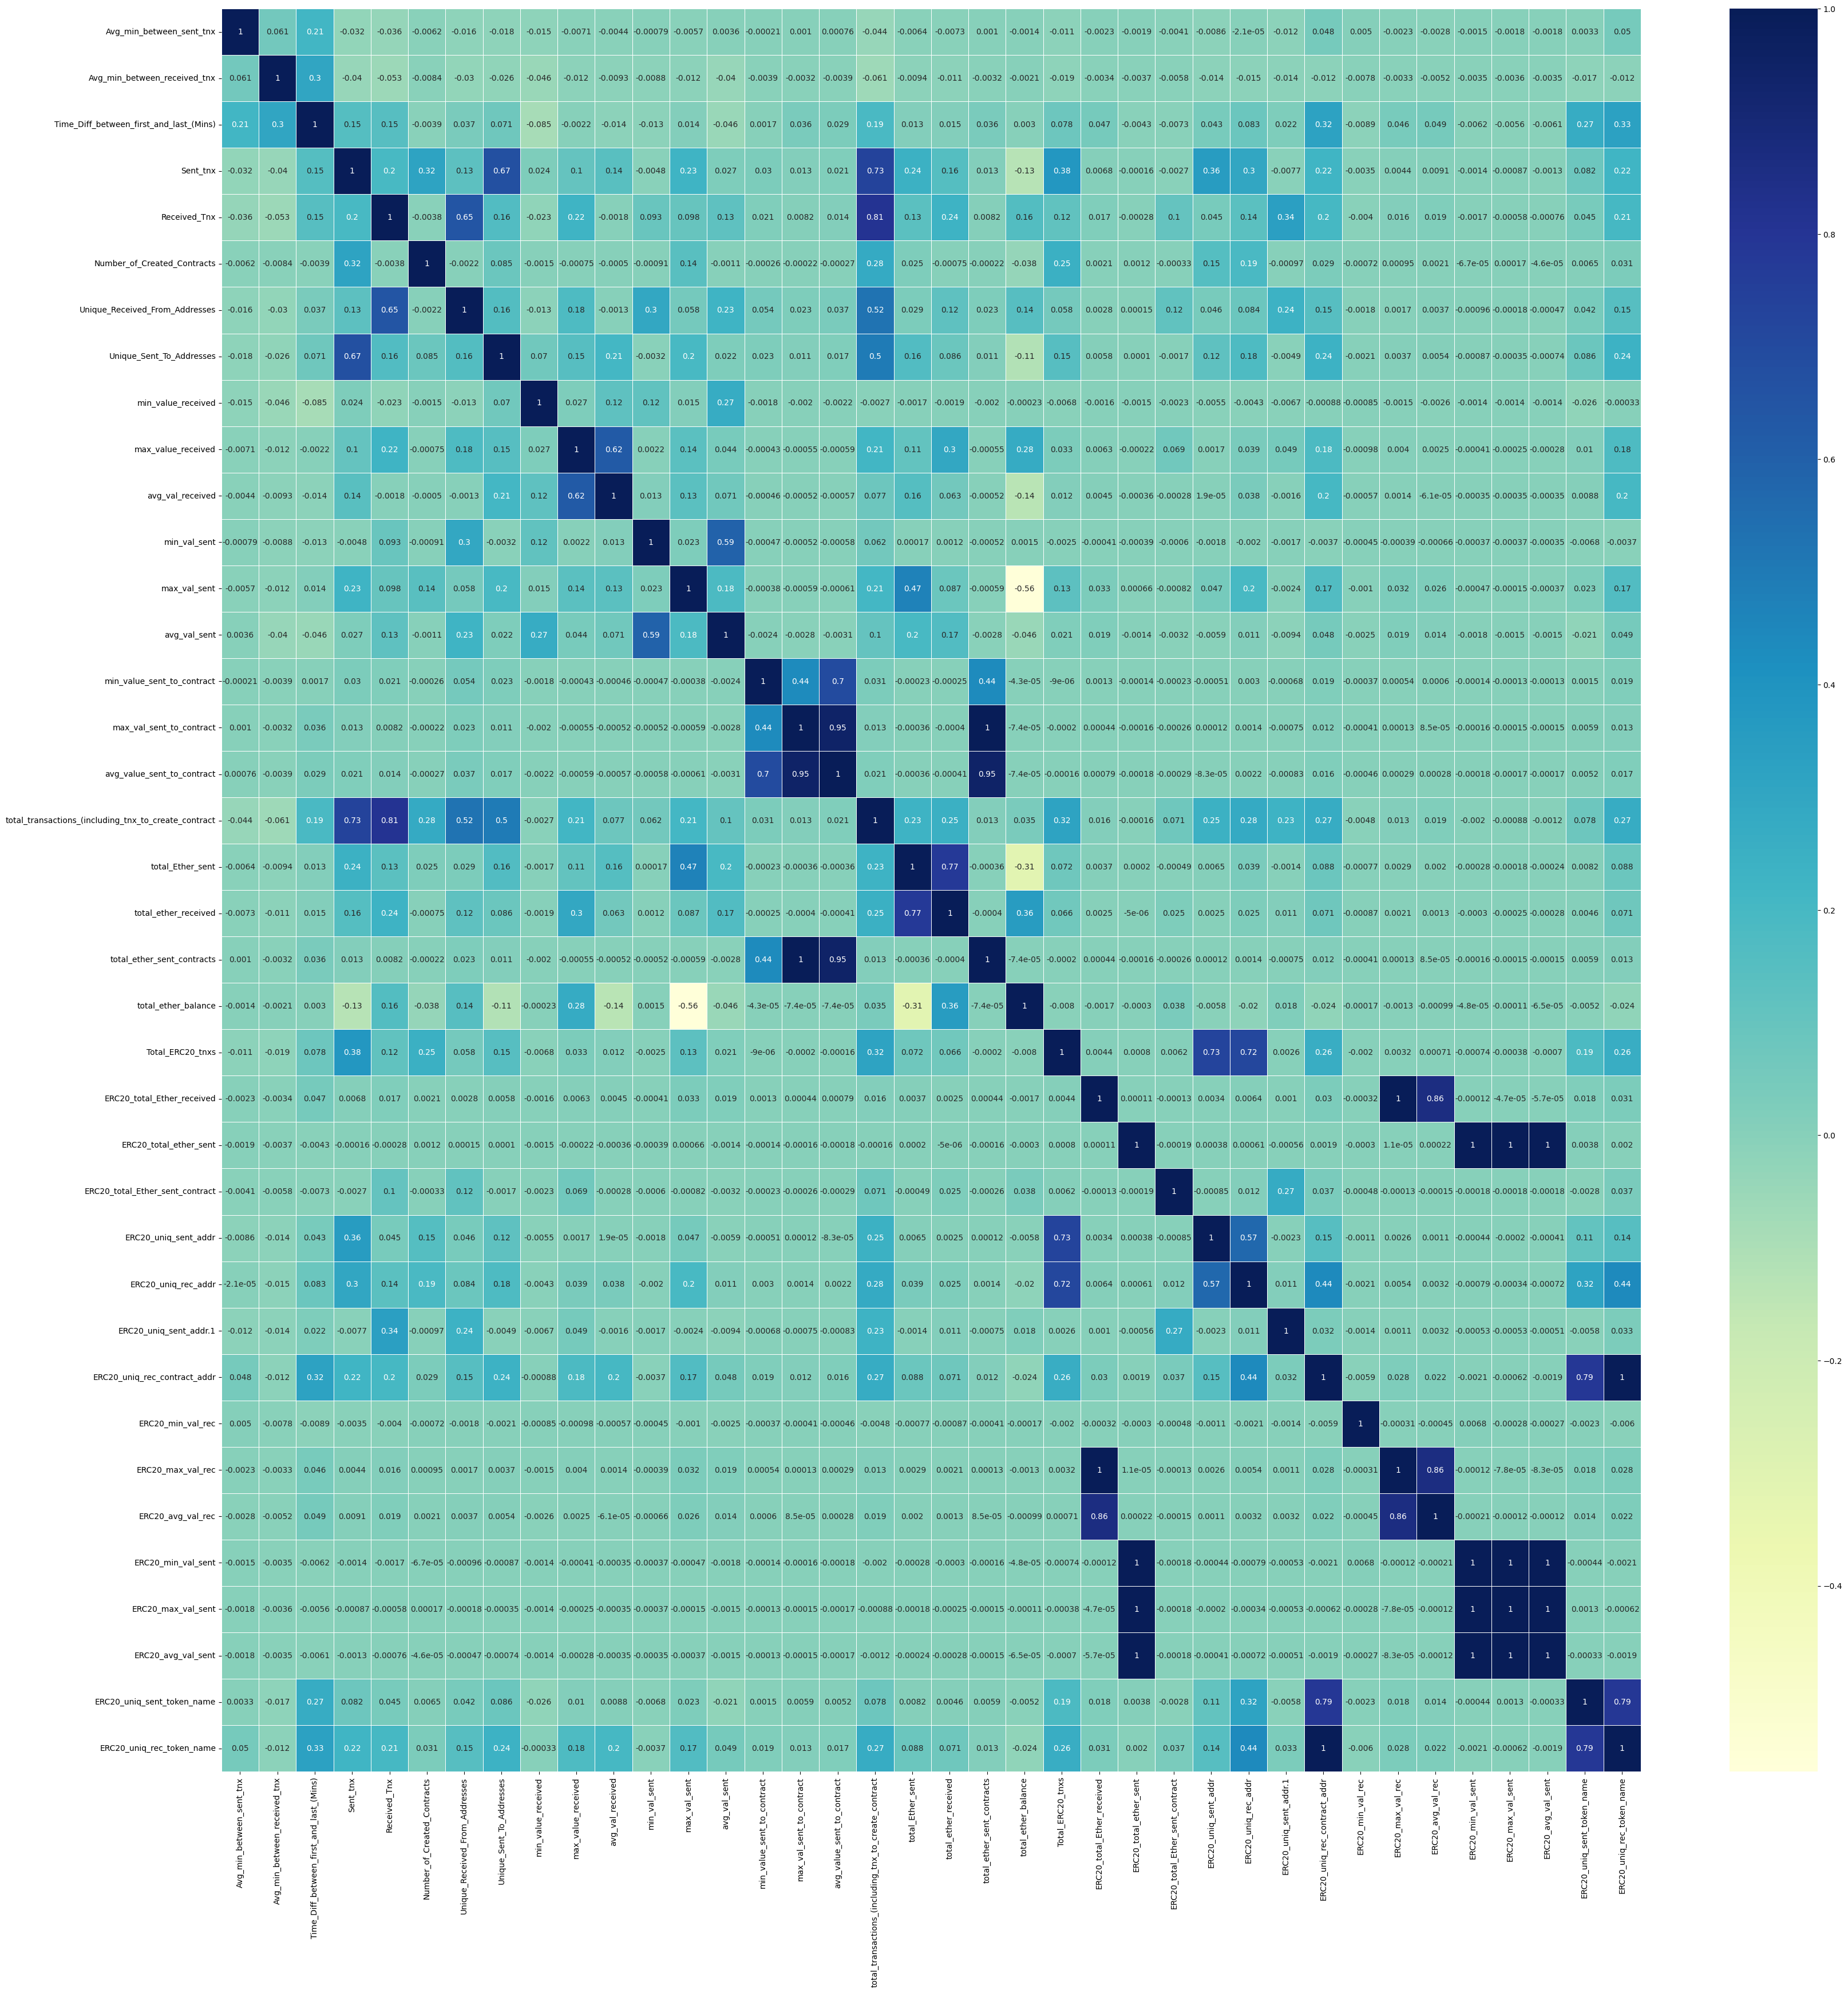

In [42]:
#Before we build the model we check for colienarity between the variables.
plt.figure(figsize = (40,40))
sns.heatmap(X.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

1. Overall Multicolineartiy among the variables seem to be low.
2. There are a few columns that pose are highly correlated: column 'Total Ether Sent' has high correlation to minimum & max value sent.
3. Conducting an analysis on upper triangle matrix and setting a threshold to drop columns with a multicolineary index more that 0.75 

In [43]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper.head()

Avg_min_between_sent_tnx   
Avg_min_between_sent_tnx                                      NaN  \
Avg_min_between_received_tnx                                  NaN   
Time_Diff_between_first_and_last_(Mins)                       NaN   
Sent_tnx                                                      NaN   
Received_Tnx                                                  NaN   

                                         Avg_min_between_received_tnx   
Avg_min_between_sent_tnx                                     0.060979  \
Avg_min_between_received_tnx                                      NaN   
Time_Diff_between_first_and_last_(Mins)                           NaN   
Sent_tnx                                                          NaN   
Received_Tnx                                                      NaN   

                                         Time_Diff_between_first_and_last_(Mins)   
Avg_min_between_sent_tnx                                                0.214722  \
Avg_min_between_received_tnx                                            0.303897   
Time_Diff_between_first_and_last_(Mins)                                      NaN   
Sent_tnx                                                                     NaN   
Received_Tnx                                                                 NaN   

                                         Sent_tnx  Received_Tnx   
Avg_min_between_sent_tnx                -0.032289     -0.035735  \
Avg_min_between_received_tnx            -0.040419     -0.053478   
Time_Diff_between_first_and_last_(Mins)  0.154480      0.148376   
Sent_tnx                                      NaN      0.198455   
Received_Tnx                                  NaN           NaN   

                                         Number_of_Created_Contracts   
Avg_min_between_sent_tnx                                   -0.006186  \
Avg_min_between_received_tnx                               -0.008378   
Time_Diff_between_first_and_last_(Mins)                    -0.003881   
Sent_tnx                                                    0.320603   
Received_Tnx                                               -0.003838   

                                         Unique_Received_From_Addresses   
Avg_min_between_sent_tnx                                      -0.015912  \
Avg_min_between_received_tnx                                  -0.029571   
Time_Diff_between_first_and_last_(Mins)                        0.037043   
Sent_tnx                                                       0.130064   
Received_Tnx                                                   0.648655   

                                         Unique_Sent_To_Addresses   
Avg_min_between_sent_tnx                                -0.017688  \
Avg_min_between_received_tnx                            -0.025747   
Time_Diff_between_first_and_last_(Mins)                  0.071140   
Sent_tnx                                                 0.670014   
Received_Tnx                                             0.164112   

                                         min_value_received   
Avg_min_between_sent_tnx                          -0.014886  \
Avg_min_between_received_tnx                      -0.045753   
Time_Diff_between_first_and_last_(Mins)           -0.084996   
Sent_tnx                                           0.024015   
Received_Tnx                                      -0.022936   

                                         max_value_received  avg_val_received   
Avg_min_between_sent_tnx                          -0.007104         -0.004382  \
Avg_min_between_received_tnx                      -0.011575         -0.009313   
Time_Diff_between_first_and_last_(Mins)           -0.002240         -0.014002   
Sent_tnx                                           0.102109          0.140677   
Received_Tnx                                       0.224805         -0.001786   

                                         min_val_sent  max_val_sent   
Avg_min_between_sent_tnx                   

In [44]:
multicorelated_cols = [column for column in upper.columns if (any(upper[column] > 0.75))]

In [45]:
multicorelated_cols

['avg_value_sent_to_contract',
 'total_transactions_(including_tnx_to_create_contract',
 'total_ether_received',
 'total_ether_sent_contracts',
 'ERC20_max_val_rec',
 'ERC20_avg_val_rec',
 'ERC20_min_val_sent',
 'ERC20_max_val_sent',
 'ERC20_avg_val_sent',
 'ERC20_uniq_sent_token_name',
 'ERC20_uniq_rec_token_name']

In [46]:
X.drop(multicorelated_cols,axis=1,inplace=True)

In [47]:
X.shape

(9841, 27)

In [48]:
final_df = X.copy(deep=True) 

In [49]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9836    1
9837    1
9838    1
9839    1
9840    1
Name: FLAG, Length: 9841, dtype: int64

In [50]:
final_df['FLAG'] = Y

In [51]:
final_df.shape

(9841, 28)

1. Checking lower triangular matrix to identify significance of variables with target variable & eleminating variables that have less than -0.75 corealtion with the target variable

In [52]:
final_corr = final_df.corr()

In [53]:
final_corr

Avg_min_between_sent_tnx   
Avg_min_between_sent_tnx                                 1.000000  \
Avg_min_between_received_tnx                             0.060979   
Time_Diff_between_first_and_last_(Mins)                  0.214722   
Sent_tnx                                                -0.032289   
Received_Tnx                                            -0.035735   
Number_of_Created_Contracts                             -0.006186   
Unique_Received_From_Addresses                          -0.015912   
Unique_Sent_To_Addresses                                -0.017688   
min_value_received                                      -0.014886   
max_value_received                                      -0.007104   
avg_val_received                                        -0.004382   
min_val_sent                                            -0.000789   
max_val_sent                                            -0.005716   
avg_val_sent                                             0.003597   
min_value_sent_to_contract                              -0.000210   
max_val_sent_to_contract                                 0.001044   
total_Ether_sent                                        -0.006440   
total_ether_balance                                     -0.001425   
Total_ERC20_tnxs                                        -0.011061   
ERC20_total_Ether_received                              -0.002339   
ERC20_total_ether_sent                                  -0.001916   
ERC20_total_Ether_sent_contract                         -0.004101   
ERC20_uniq_sent_addr                                    -0.008615   
ERC20_uniq_rec_addr                                     -0.000021   
ERC20_uniq_sent_addr.1                                  -0.011862   
ERC20_uniq_rec_contract_addr                             0.047946   
ERC20_min_val_rec                                        0.004998   
FLAG                                                    -0.029754   

                                         Avg_min_between_received_tnx   
Avg_min_between_sent_tnx                                     0.060979  \
Avg_min_between_received_tnx                                 1.000000   
Time_Diff_between_first_and_last_(Mins)                      0.303897   
Sent_tnx                                                    -0.040419   
Received_Tnx                                                -0.053478   
Number_of_Created_Contracts                                 -0.008378   
Unique_Received_From_Addresses                              -0.029571   
Unique_Sent_To_Addresses                                    -0.025747   
min_value_received                                          -0.045753   
max_value_received                                          -0.011575   
avg_val_received                                            -0.009313   
min_val_sent                                                -0.008761   
max_val_sent                                                -0.012176   
avg_val_sent                                                -0.040011   
min_value_sent_to_contract                                  -0.003916   
max_val_sent_to_contract                                    -0.003230   
total_Ether_sent                                            -0.009442   
total_ether_balance                                         -0.002149   
Total_ERC20_tnxs                                            -0.019177   
ERC20_total_Ether_received                                  -0.003430   
ERC20_total_ether_sent                                      -0.003653   
ERC20_total_Ether_sent_contract                             -0.005813   
ERC20_uniq_sent_addr                                        -0.013811   
ERC20_uniq_rec_addr                                         -0.014694   
ERC20_uniq_sent_addr.1                                      -0.013750   
ERC20_uniq_rec_contract_addr                                -0.011693   
ERC20_min_val_rec                                           -0.00779

In [54]:
lower = final_corr.where(np.tril(np.ones(final_corr.shape), k=0).astype(bool))
lower

Avg_min_between_sent_tnx   
Avg_min_between_sent_tnx                                 1.000000  \
Avg_min_between_received_tnx                             0.060979   
Time_Diff_between_first_and_last_(Mins)                  0.214722   
Sent_tnx                                                -0.032289   
Received_Tnx                                            -0.035735   
Number_of_Created_Contracts                             -0.006186   
Unique_Received_From_Addresses                          -0.015912   
Unique_Sent_To_Addresses                                -0.017688   
min_value_received                                      -0.014886   
max_value_received                                      -0.007104   
avg_val_received                                        -0.004382   
min_val_sent                                            -0.000789   
max_val_sent                                            -0.005716   
avg_val_sent                                             0.003597   
min_value_sent_to_contract                              -0.000210   
max_val_sent_to_contract                                 0.001044   
total_Ether_sent                                        -0.006440   
total_ether_balance                                     -0.001425   
Total_ERC20_tnxs                                        -0.011061   
ERC20_total_Ether_received                              -0.002339   
ERC20_total_ether_sent                                  -0.001916   
ERC20_total_Ether_sent_contract                         -0.004101   
ERC20_uniq_sent_addr                                    -0.008615   
ERC20_uniq_rec_addr                                     -0.000021   
ERC20_uniq_sent_addr.1                                  -0.011862   
ERC20_uniq_rec_contract_addr                             0.047946   
ERC20_min_val_rec                                        0.004998   
FLAG                                                    -0.029754   

                                         Avg_min_between_received_tnx   
Avg_min_between_sent_tnx                                          NaN  \
Avg_min_between_received_tnx                                 1.000000   
Time_Diff_between_first_and_last_(Mins)                      0.303897   
Sent_tnx                                                    -0.040419   
Received_Tnx                                                -0.053478   
Number_of_Created_Contracts                                 -0.008378   
Unique_Received_From_Addresses                              -0.029571   
Unique_Sent_To_Addresses                                    -0.025747   
min_value_received                                          -0.045753   
max_value_received                                          -0.011575   
avg_val_received                                            -0.009313   
min_val_sent                                                -0.008761   
max_val_sent                                                -0.012176   
avg_val_sent                                                -0.040011   
min_value_sent_to_contract                                  -0.003916   
max_val_sent_to_contract                                    -0.003230   
total_Ether_sent                                            -0.009442   
total_ether_balance                                         -0.002149   
Total_ERC20_tnxs                                            -0.019177   
ERC20_total_Ether_received                                  -0.003430   
ERC20_total_ether_sent                                      -0.003653   
ERC20_total_Ether_sent_contract                             -0.005813   
ERC20_uniq_sent_addr                                        -0.013811   
ERC20_uniq_rec_addr                                         -0.014694   
ERC20_uniq_sent_addr.1                                      -0.013750   
ERC20_uniq_rec_contract_addr                                -0.011693   
ERC20_min_val_rec                                           -0.00779

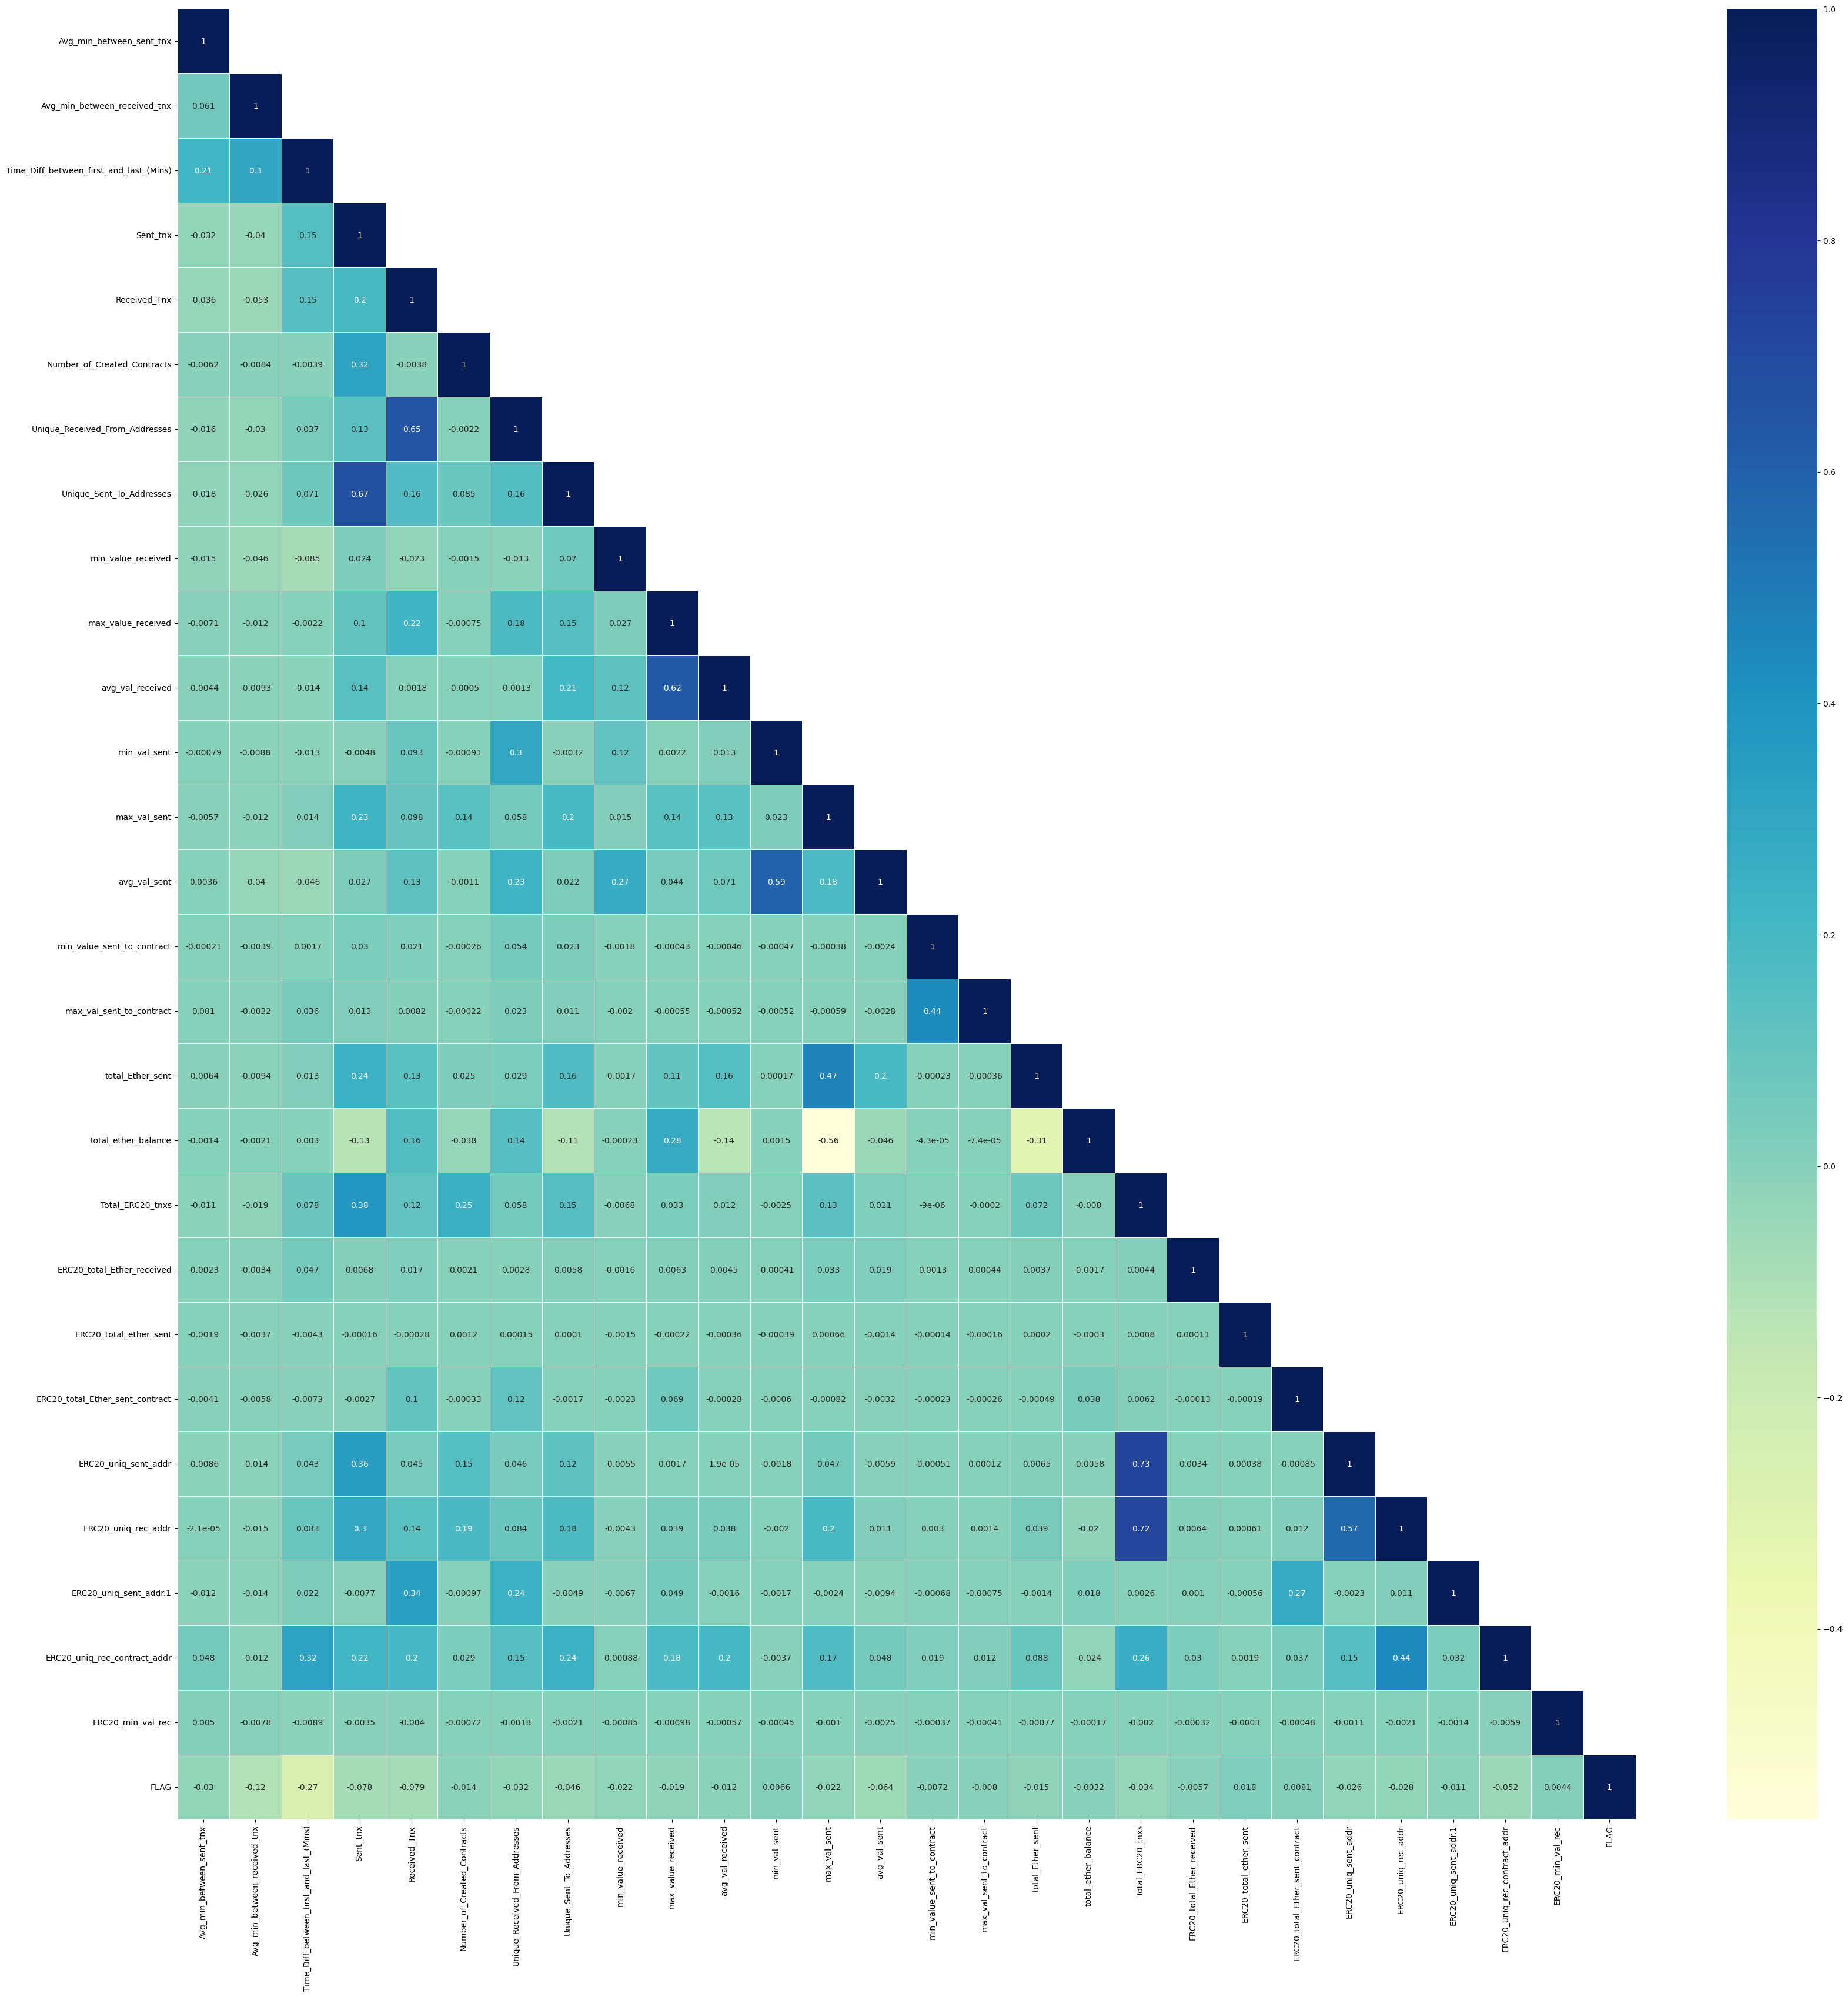

In [55]:
#Before we build the model we check for colienarity between the variables.
plt.figure(figsize = (40,40))
sns.heatmap(lower, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Variable Scaling & Train Test Split

In [56]:
def scaler(X):
    sc = StandardScaler()
    sc.fit(X)
    pickle.dump(sc, open('../outputs/scaler.pkl','wb'))
    scaled = sc.transform(X)
    scaled = pd.DataFrame(scaled,columns=X.columns)
    return scaled

In [57]:
X_transformed = scaler(X)

In [58]:
Y.value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, train_size=0.8, test_size=0.2, random_state=100)

In [60]:
X_transformed.shape

(9841, 27)

In [61]:
X_test.shape

(1969, 27)

In [62]:
y_train.value_counts()

FLAG
0    6131
1    1741
Name: count, dtype: int64

In [63]:
y_test.value_counts()

FLAG
0    1531
1     438
Name: count, dtype: int64

1. The distribution of the target variable is in the entire dataset is not balanced.
2. Step 1 is to train the model of the available data
3. If performace of the model is poor then we can use resampling techinques such as ADSYN

### Constrained Logistic Regression

1. Since there are 28 predictor variable. there is a high possibility that not all of them contribute to the target variable.
2. We can use the L1 penalty to constrain the loss region. This also eliminates the non-variables as their coefficient is set to zero

In [64]:
### Using Grid Search CV
c = [1,10,100,1000]
optimizer = ['lbfgs','liblinear','newton-cg','newton-cholesky','saga','sag'] 

In [65]:
hyperparams = dict(C = c,penalty  = ['l2'],solver=optimizer)

In [66]:
log_reg_1 = LogisticRegression()
gridsearch = GridSearchCV(log_reg_1,hyperparams)

In [67]:
best_model = gridsearch.fit(X_train,y_train)

In [68]:
print("Best Estimator Parms: ",best_model.best_estimator_)
print("Accuracy Score on the best estimator: ",round(best_model.best_score_*100,2))

Best Estimator Parms:  LogisticRegression(C=10, solver='sag')
Accuracy Score on the best estimator:  78.14


In [69]:
log_reg_v1_init = LogisticRegression(C=10,solver='sag',random_state=42)
log_reg_v1 = log_reg_v1_init.fit(X_train,y_train)

In [70]:
y_pred = log_reg_v1.predict(X_test)

In [71]:
error = pd.DataFrame({'Y':list(y_test),'Y-hat':y_pred})

In [72]:
cmatrix = confusion_matrix(error['Y'],error['Y-hat'])

In [73]:
cmatrix

array([[1530,    1],
       [ 434,    4]])

In [74]:
error['Y'].value_counts()

Y
0    1531
1     438
Name: count, dtype: int64

In [75]:
error['Y-hat'].value_counts()

Y-hat
0    1964
1       5
Name: count, dtype: int64

<Axes: >

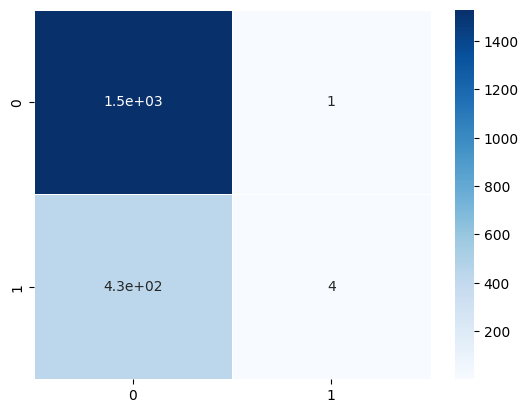

In [76]:
sns.heatmap(cmatrix,linewidths=0.5,annot=True,cmap='Blues')

### Defining H0 & H1
1. H0: A transaction is not fradulent
2. H1: A transaction is fradulent.

1. The confusion matrix shows a clear sign of overfitting.
2. This is due to the highly imbalanced target variable.
3. The "0" in the target variable defines Non Fradulent transactions. The "1" denotes fradulent transactions.
4. Due to the imbalance the fradulent transactions are being classified into non fradulent.
5. The Type II error is high (false-negative), meaning "1" is classified as "0". 

In [77]:
TP = cmatrix[1,1] # true positive 
TN = cmatrix[0,0] # true negatives
FP = cmatrix[0,1] # false positives
FN = cmatrix[1,0] # false negatives

In [78]:
print ('Sensitivity : ', TP / float(TP+FN))
print ('Specificity : ', TN / float(TN+FP))
print ('Precision   : ', TP / float(TP + FP))
print ('Recall      : ', TP / float(TP + FN))

Sensitivity :  0.0091324200913242
Specificity :  0.999346832135859
Precision   :  0.8
Recall      :  0.0091324200913242


1. The precision of the model is high but the recall is really low, this displays the inability of the model to classiify fradulent transactions.
2. for this case we want precison & recall to both be high.
3. The Model is not good at classifying this is backed up by the F1 score

In [79]:
print('F1_score:',round(f1_score(error['Y'],error['Y-hat'])*100,2))

F1_score: 1.81


In [80]:
print("Accuracy Score", round(accuracy_score(error['Y'],error['Y-hat'])*100,2),"%")

Accuracy Score 77.91 %


### Using sampling techniqques to balance the classes

In [81]:
def resample(X,Y):
    
    X = scaler(X)
    random_oversampler = RandomOverSampler(sampling_strategy='minority',random_state=42)
    adasyn = ADASYN(sampling_strategy='minority',random_state=42)
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,train_size=0.7,test_size=0.3)
    
    ro_x_train, ro_y_train = random_oversampler.fit_resample(x_train,y_train)
    ady_x_train, ady_y_train = adasyn.fit_resample(x_train,y_train)
    
    
    return ro_x_train, ro_y_train, ady_x_train, ady_y_train, x_test, y_test

In [82]:
ro_x_train, ro_y_train, ady_x_train, ady_y_train, x_test, y_test = resample(X,Y)

In [83]:
#XGB parameters
params_XGB={
  'learning_rate':[0.01,0.1,0.3,0.5,0.7],
  'max_depth':[2,3,4,10],
  'n_estimators':[10,15,20,50,100,200],
  'subsample':[0.3, 0.5, 0.9],
  'colsample_bytree':[0.3,0.5,0.7]
}

#Logistic regression parameters
params_LR = {'C':np.logspace(-1, 5, 10), 'class_weight':[None,'balanced'], 'penalty':['l1','l2']}

In [84]:
#logistic regression
lr = LogisticRegression()

# XGboost
model_xgb = xgb.XGBClassifier()

In [85]:
def random_search(model,params,predictors,target):
    
    rcv = RandomizedSearchCV(model, params, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(predictors, target)
    print("Best Estimator Parms: ",rcv.best_params_)
    print("Accuracy Score on the best estimator: ",round(rcv.best_score_*100,2))
    
    return None
    

In [86]:
random_search(lr,params_LR,ro_x_train,ro_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best Estimator Parms:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
Accuracy Score on the best estimator:  86.85


In [87]:
random_search(lr,params_LR,ady_x_train,ady_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best Estimator Parms:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
Accuracy Score on the best estimator:  74.54


/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [88]:
random_search(model_xgb,params_XGB,ro_x_train,ro_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator Parms:  {'subsample': 0.9, 'n_estimators': 15, 'max_depth': 10, 'learning_rate': 0.7, 'colsample_bytree': 0.3}
Accuracy Score on the best estimator:  99.97


In [89]:
random_search(model_xgb,params_XGB,ady_x_train,ady_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator Parms:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.7, 'colsample_bytree': 0.5}
Accuracy Score on the best estimator:  99.92


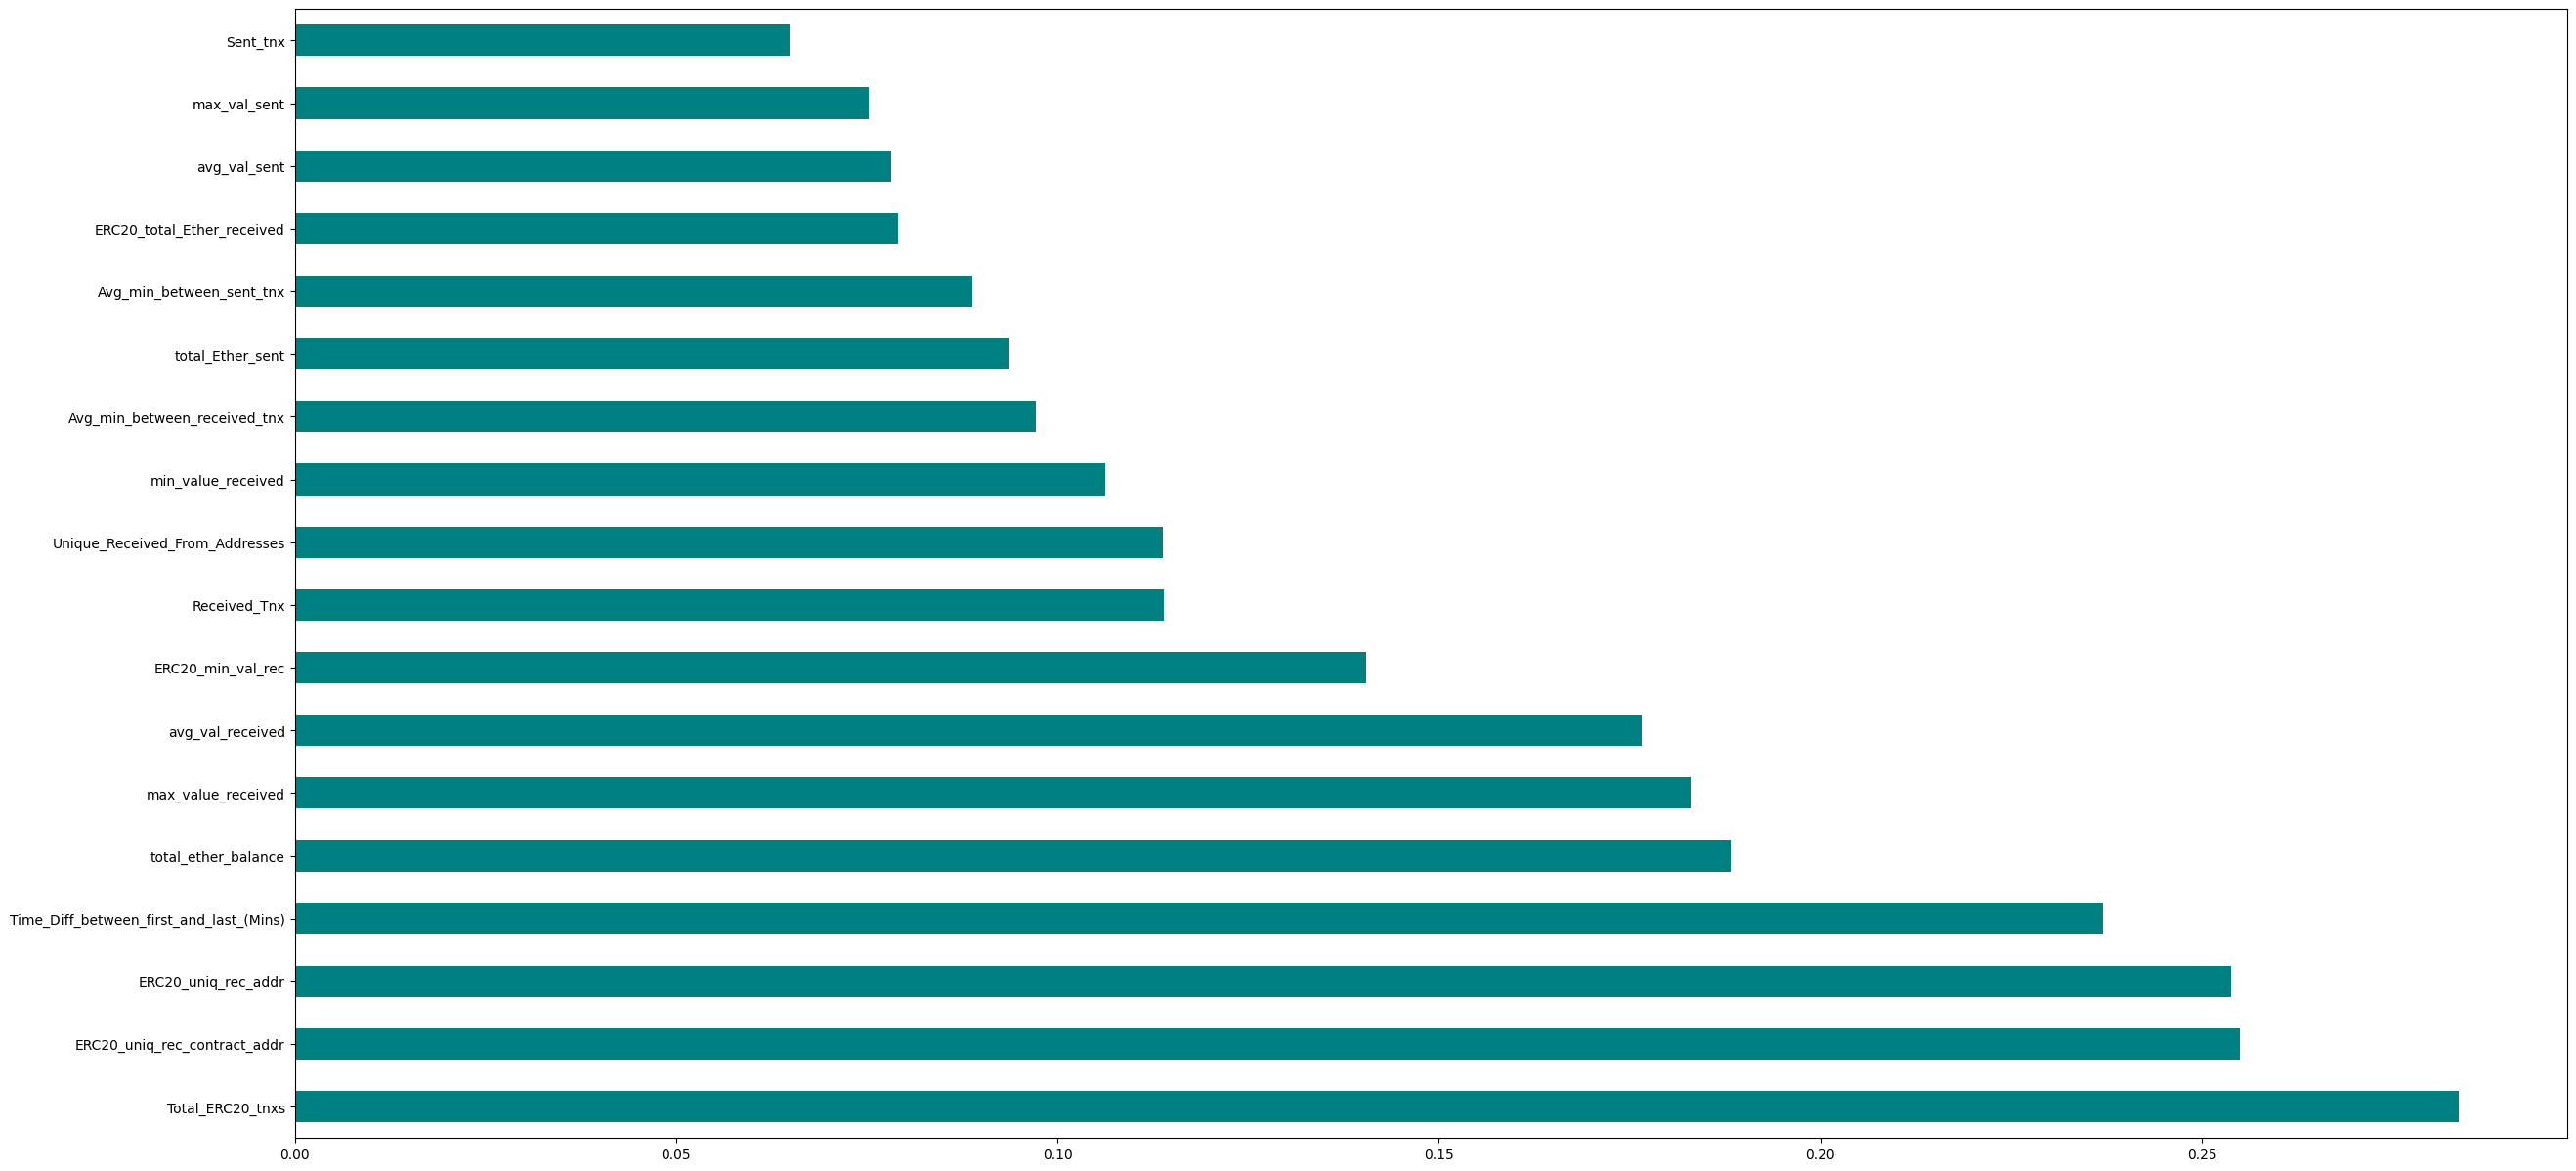

In [90]:
importance=mutual_info_classif(X_train,y_train)
feat_importances=pd.Series(importance,X_train.columns[0:len(X_train.columns)])
plt.figure(figsize=[30,15])


feat_importances.nlargest(18).plot(kind='barh',color='teal',)

plt.show()

In [91]:
#list of 18 important features
col_x=feat_importances.nlargest(18).index
col_x

Index(['Total_ERC20_tnxs', 'ERC20_uniq_rec_contract_addr',
       'ERC20_uniq_rec_addr', 'Time_Diff_between_first_and_last_(Mins)',
       'total_ether_balance', 'max_value_received', 'avg_val_received',
       'ERC20_min_val_rec', 'Received_Tnx', 'Unique_Received_From_Addresses',
       'min_value_received', 'Avg_min_between_received_tnx',
       'total_Ether_sent', 'Avg_min_between_sent_tnx',
       'ERC20_total_Ether_received', 'avg_val_sent', 'max_val_sent',
       'Sent_tnx'],
      dtype='object')

In [92]:
new_X = X[col_x]

In [93]:
new_X.columns  = ['total_erc20_tnxs', 'erc20_uniq_rec_addr',
       'erc20_uniq_rec_contract_addr',
       'time_diff', 'total_ether_balance',
       'max_value_received', 'avg_val_received', 'erc20_min_val_rec',
       'unique_received_from_addresses', 'received_tnx', 'min_value_received',
       'avg_min_between_received_tnx', 'avg_min_between_sent_tnx',
       'total_ether_sent', 'max_val_sent', 'erc20_total_ether_received',
       'avg_val_sent', 'sent_tnx']

In [94]:
ro_x_train, ro_y_train, ady_x_train, ady_y_train, x_test, y_test = resample(new_X,Y)

In [95]:
ro_lr = random_search(lr,params_LR,ro_x_train,ro_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best Estimator Parms:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
Accuracy Score on the best estimator:  85.63


In [96]:
ada_lr = random_search(lr,params_LR,ady_x_train,ady_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ash54/miniconda3/envs/API/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best Estimator Parms:  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 215.44346900318823}
Accuracy Score on the best estimator:  72.86


In [97]:
ro_xgb = random_search(model_xgb,params_XGB,ro_x_train,ro_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator Parms:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.7, 'colsample_bytree': 0.5}
Accuracy Score on the best estimator:  99.97


In [98]:
ada_xgb = random_search(model_xgb,params_XGB,ady_x_train,ady_y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator Parms:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.7, 'colsample_bytree': 0.5}
Accuracy Score on the best estimator:  99.89


1. The above analysis proves that the model performance improves when implementing Random Oversampling.
2. Logistic Regression runs out of iterations before convergence
3. XG Boost could have a problem of ovefitting
4. The scores dont significantly change after reducing the amount of variable from 27 to 18 (So 18 will be the input params)

In [99]:
linear_regression_model_init = LogisticRegression(random_state=42,C=21544.346900318822,penalty='l2') 

In [100]:
log_reg_v2 = linear_regression_model_init.fit(ro_x_train,ro_y_train)

In [101]:
log_reg_pred = log_reg_v2.predict(x_test)

In [102]:
log_reg_predictions = pd.DataFrame({'Y':y_test,'Y-Hat':log_reg_pred}) 

In [103]:
log_reg_predictions

Y  Y-Hat
7763  1      0
8655  1      1
106   0      1
439   0      1
2420  0      0
...  ..    ...
3574  0      1
4824  0      0
1157  0      0
7786  1      1
1532  0      1

[2953 rows x 2 columns]

In [104]:
log_cmatrix = confusion_matrix(log_reg_predictions['Y'],log_reg_predictions['Y-Hat'])
log_cmatrix

array([[1260, 1043],
       [  88,  562]])

<Axes: >

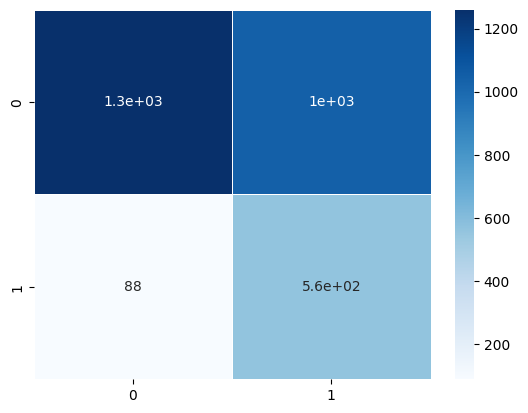

In [105]:
sns.heatmap(log_cmatrix,linewidths=0.5,annot=True,cmap='Blues')

In [106]:
TP = log_cmatrix[1,1] # true positive 
TN = log_cmatrix[0,0] # true negatives
FP = log_cmatrix[0,1] # false positives
FN = log_cmatrix[1,0] # false negatives

print ('Sensitivity : ', TP / float(TP+FN))
print ('Specificity : ', TN / float(TN+FP))
print ('Precision   : ', TP / float(TP + FP))
print ('Recall      : ', TP / float(TP + FN))

print('F1_score:',round(f1_score(log_reg_predictions['Y'],log_reg_predictions['Y-Hat'])*100,2))

print("Accuracy Score", round(accuracy_score(log_reg_predictions['Y'],log_reg_predictions['Y-Hat'])*100,2),"%")

Sensitivity :  0.8646153846153846
Specificity :  0.547112462006079
Precision   :  0.3501557632398754
Recall      :  0.8646153846153846
F1_score: 49.84
Accuracy Score 61.7 %


In [107]:
### AUC ROC curve
fpr, tpr, thresholds = roc_curve(log_reg_predictions['Y'], log_reg_predictions['Y-Hat'])

In [108]:
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [109]:
xgboots_model_init = xgb.XGBClassifier(random_state=42,subsample=0.9,n_estimators=200,max_depth=2,learning_rate=0.7,colsample_bytree=0.5)

In [110]:
ro_x_train.columns 

Index(['total_erc20_tnxs', 'erc20_uniq_rec_addr',
       'erc20_uniq_rec_contract_addr', 'time_diff', 'total_ether_balance',
       'max_value_received', 'avg_val_received', 'erc20_min_val_rec',
       'unique_received_from_addresses', 'received_tnx', 'min_value_received',
       'avg_min_between_received_tnx', 'avg_min_between_sent_tnx',
       'total_ether_sent', 'max_val_sent', 'erc20_total_ether_received',
       'avg_val_sent', 'sent_tnx'],
      dtype='object')

In [111]:
xgbclassifier = xgboots_model_init.fit(ro_x_train,ro_y_train)

In [125]:
ro_x_train.columns

Index(['total_erc20_tnxs', 'erc20_uniq_rec_addr',
       'erc20_uniq_rec_contract_addr', 'time_diff', 'total_ether_balance',
       'max_value_received', 'avg_val_received', 'erc20_min_val_rec',
       'unique_received_from_addresses', 'received_tnx', 'min_value_received',
       'avg_min_between_received_tnx', 'avg_min_between_sent_tnx',
       'total_ether_sent', 'max_val_sent', 'erc20_total_ether_received',
       'avg_val_sent', 'sent_tnx'],
      dtype='object')

In [112]:
xgb_pred = xgbclassifier.predict(x_test)

In [113]:
xgb_predictions = pd.DataFrame({'Y':y_test,'Y-Hat':xgb_pred})

In [114]:
xgb_predictions

Y  Y-Hat
7763  1      1
8655  1      1
106   0      0
439   0      0
2420  0      0
...  ..    ...
3574  0      0
4824  0      0
1157  0      0
7786  1      1
1532  0      0

[2953 rows x 2 columns]

In [115]:
cmatrix_xgb = confusion_matrix(xgb_predictions['Y'],xgb_predictions['Y-Hat'])

<Axes: >

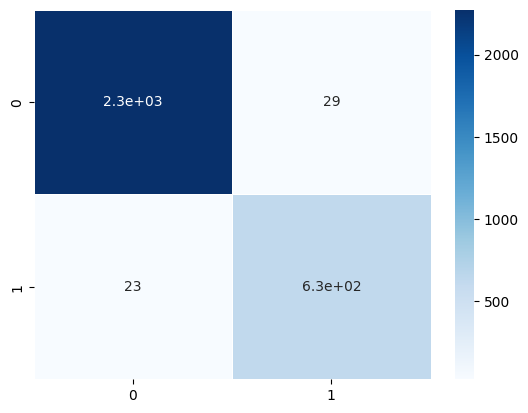

In [116]:
sns.heatmap(cmatrix_xgb,linewidths=0.5,annot=True,cmap='Blues')

In [117]:
TP = cmatrix_xgb[1,1] # true positive 
TN = cmatrix_xgb[0,0] # true negatives
FP = cmatrix_xgb[0,1] # false positives
FN = cmatrix_xgb[1,0] # false negatives

print ('Sensitivity : ', TP / float(TP+FN))
print ('Specificity : ', TN / float(TN+FP))
print ('Precision   : ', TP / float(TP + FP))
print ('Recall      : ', TP / float(TP + FN))

print('F1_score:',round(f1_score(xgb_predictions['Y'],xgb_predictions['Y-Hat'])*100,2))

print("Accuracy Score", round(accuracy_score(xgb_predictions['Y'],xgb_predictions['Y-Hat'])*100,2),"%")

Sensitivity :  0.9646153846153847
Specificity :  0.9874077290490665
Precision   :  0.9557926829268293
Recall      :  0.9646153846153847
F1_score: 96.02
Accuracy Score 98.24 %


In [118]:
### AUC ROC curve
### AUC ROC curve
fpr, tpr, thresholds = roc_curve(xgb_predictions['Y'], xgb_predictions['Y-Hat'])
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [119]:
deployment_cols = list(ro_x_train.columns)

In [120]:
with open('../outputs/ColNames.txt', 'w') as fp:
    for item in deployment_cols:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


### Conclusion

1. The logistic regression model is unable to caputure the sperability in the transactions.
2. XGBoost model significantly outperformes the logit model hence we will use XGBoost as the base model for classifying an Etherium transaction as fraud.

In [121]:
pickle.dump(xgbclassifier, open('../outputs/xbg.pkl', "wb"))

In [122]:
input_dict = new_X.to_dict(orient='index')

In [123]:
input1 = input_dict[7763]
input2 = input_dict[0]

In [124]:
with open('../outputs/input1.json', 'w') as fp:
    json.dump(input1, fp)  
with open('../outputs/input2.json', 'w') as fp:
    json.dump(input2, fp)  
